Загрузка и тестирование модели Maskformer на следующем фото:
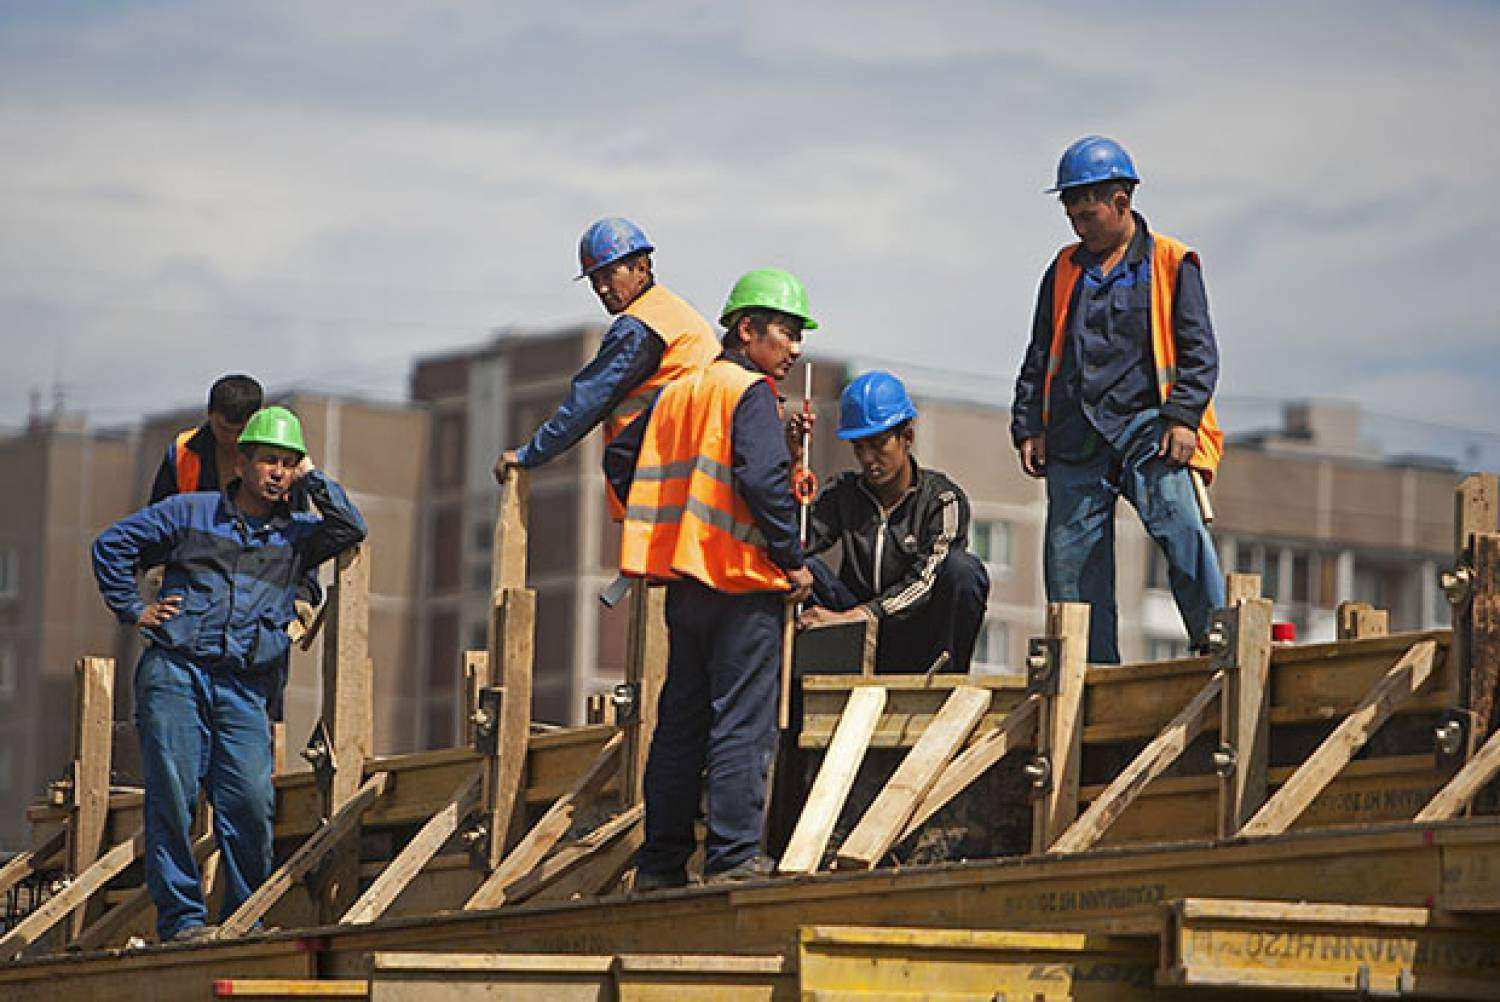

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:410: UserWarning: The following named arguments are not valid for `MaskFormerImageProcessor.__init__` and were ignored: 'size_divisibility'
  image_processor = cls(**image_processor_dict)
Device set to use cpu
`label_ids_to_fuse` unset. No instance will be fused.


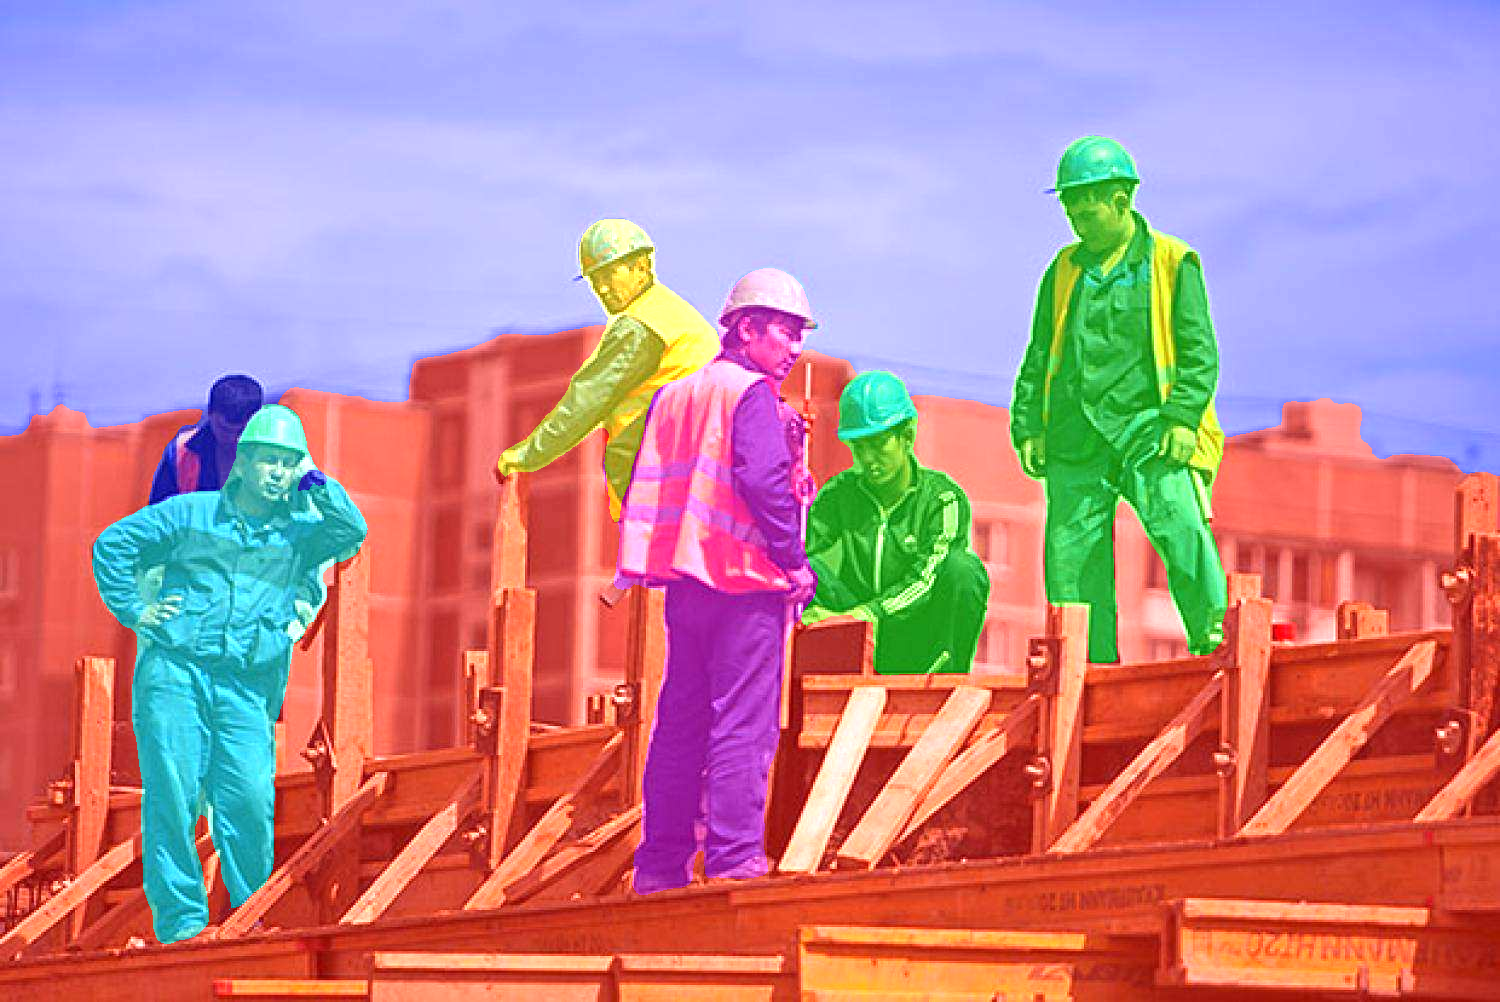

In [7]:
import numpy as np
import cv2
from PIL import Image
from transformers import pipeline
from google.colab.patches import cv2_imshow


image = Image.open("helmet.jpg")

segmentation = pipeline("image-segmentation", "facebook/maskformer-swin-base-coco")
results = segmentation(inputs=image, subtask="panoptic")

# Получаем размеры исходного изображения (ширину и высоту)
width, height = image.size

overlay = np.zeros((height, width, 3), dtype=np.uint8)


colors = [
    (0, 255, 0),    # Зеленый
    (255, 0, 0),    # Синий
    (0, 0, 255),    # Красный
    (0, 255, 255),  # Желтый
    (255, 0, 255),  # Фиолетовый
    (255, 255, 0)   # Голубой
]

# Проходимся по каждому результату и накладываем цветные маски на холст
for i, result in enumerate(results):
    mask = result['mask']
    mask_np = np.array(mask)

    # Выбираем цвет из нашего списка (используем остаток от деления, чтобы не выйти за пределы списка)
    color = colors[i % len(colors)]

    # Находим все пиксели, где маска не черная (значение > 0)
    overlay[mask_np > 0] = color

# Преобразуем исходное изображение в формат OpenCV (BGR)
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Объединяем исходное изображение с нашим цветным холстом
final_image = cv2.addWeighted(image_cv2, 1, overlay, 0.5, 0)

# Отображаем финальное изображение
cv2_imshow(final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()